# Apple stock analysis

This notebook will help you re-do the apple stock assignment using pandas.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import pandas_datareader.data as web

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
sns.set_context("poster")
sns.set_style("ticks")

## Get the data from website

Example at: https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#yahoo-finance

In [3]:
start_date = datetime.datetime(1980, 12, 12)
end_date = datetime.datetime(2017, 2, 14)

print("Start date: {}\nEnd date: {}".format(start_date, end_date))

Start date: 1980-12-12 00:00:00
End date: 2017-02-14 00:00:00


In [4]:
web.DataReader?

In [5]:
df = web.DataReader("AAPL", 'yahoo', start_date, end_date)
print("Data contains {} rows and {} columns".format(*df.shape))

Data contains 9122 rows and 6 columns


In [6]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.750000,28.875000,28.750,28.750,117258400,0.425000
1980-12-15,27.375001,27.375001,27.250,27.250,43971200,0.402826
1980-12-16,25.375000,25.375000,25.250,25.250,26432000,0.373261
1980-12-17,25.875000,25.999999,25.875,25.875,21610400,0.382500
1980-12-18,26.625000,26.750000,26.625,26.625,18362400,0.393587


In [7]:
df.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-02-08,131.350006,132.220001,131.220001,132.039993,23004100,131.469994
2017-02-09,131.649994,132.449997,131.119995,132.419998,28349900,132.419998
2017-02-10,132.460007,132.940002,132.050003,132.119995,20065500,132.119995
2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400,133.289993
2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500,135.020004


We need the data in the reverse order. So let us do that.

In [8]:
df.ix[df.index.sort_values(ascending=False)].head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500,135.020004
2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400,133.289993
2017-02-10,132.460007,132.940002,132.050003,132.119995,20065500,132.119995
2017-02-09,131.649994,132.449997,131.119995,132.419998,28349900,132.419998
2017-02-08,131.350006,132.220001,131.220001,132.039993,23004100,131.469994


In [9]:
df = df.ix[df.index.sort_values(ascending=False)]
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500,135.020004
2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400,133.289993
2017-02-10,132.460007,132.940002,132.050003,132.119995,20065500,132.119995
2017-02-09,131.649994,132.449997,131.119995,132.419998,28349900,132.419998
2017-02-08,131.350006,132.220001,131.220001,132.039993,23004100,131.469994


In [10]:
df["Daily Price Range"] = (df["High"] - df["Low"])
df.head()

,Open,High,Low,Close,Volume,Adj Close,Daily Price Range
Date,,,,,,,
2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500,135.020004,1.839996
2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400,133.289993,1.070007
2017-02-10,132.460007,132.940002,132.050003,132.119995,20065500,132.119995,0.889999
2017-02-09,131.649994,132.449997,131.119995,132.419998,28349900,132.419998,1.330002
2017-02-08,131.350006,132.220001,131.220001,132.039993,23004100,131.469994,1.000000


## Finding the delta change

We will use the pandas shift function

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html

In [11]:
(df["Adj Close"] - df["Adj Close"].shift(-1)).head()

Date
2017-02-14    1.730011
2017-02-13    1.169998
2017-02-10   -0.300003
2017-02-09    0.950004
2017-02-08    0.507793
Name: Adj Close, dtype: float64

In [12]:
(df["Adj Close"] - df["Adj Close"].shift(-1)).tail()

Date
1980-12-18    0.011087
1980-12-17    0.009239
1980-12-16   -0.029565
1980-12-15   -0.022174
1980-12-12         NaN
Name: Adj Close, dtype: float64

In [13]:
df["Delta Change"] = (df["Adj Close"] - df["Adj Close"].shift(-1))
df.head()

,Open,High,Low,Close,Volume,Adj Close,Daily Price Range,Delta Change
Date,,,,,,,,
2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500,135.020004,1.839996,1.730011
2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400,133.289993,1.070007,1.169998
2017-02-10,132.460007,132.940002,132.050003,132.119995,20065500,132.119995,0.889999,-0.300003
2017-02-09,131.649994,132.449997,131.119995,132.419998,28349900,132.419998,1.330002,0.950004
2017-02-08,131.350006,132.220001,131.220001,132.039993,23004100,131.469994,1.000000,0.507793


In [13]:
df.tail()

,Open,High,Low,Close,Volume,Adj Close,Daily Price Range,Delta Change
Date,,,,,,,,
1980-12-18,26.625000,26.750000,26.625,26.625,18362400,0.393587,0.125000,0.011087
1980-12-17,25.875000,25.999999,25.875,25.875,21610400,0.382500,0.124999,0.009239
1980-12-16,25.375000,25.375000,25.250,25.250,26432000,0.373261,0.125000,-0.029565
1980-12-15,27.375001,27.375001,27.250,27.250,43971200,0.402826,0.125001,-0.022174
1980-12-12,28.750000,28.875000,28.750,28.750,117258400,0.425000,0.125000,NaN


We should fill the **NaN value** with zero. We could have done that in one go by directly calling the function on the returned value above. 

In [14]:
df["Delta Change"] = df["Delta Change"].fillna(0)
df.tail()

,Open,High,Low,Close,Volume,Adj Close,Daily Price Range,Delta Change
Date,,,,,,,,
1980-12-18,26.625000,26.750000,26.625,26.625,18362400,0.393587,0.125000,0.011087
1980-12-17,25.875000,25.999999,25.875,25.875,21610400,0.382500,0.124999,0.009239
1980-12-16,25.375000,25.375000,25.250,25.250,26432000,0.373261,0.125000,-0.029565
1980-12-15,27.375001,27.375001,27.250,27.250,43971200,0.402826,0.125001,-0.022174
1980-12-12,28.750000,28.875000,28.750,28.750,117258400,0.425000,0.125000,0.000000


In [15]:
((df["Delta Change"]/df["Adj Close"].shift(-1)) * 100).fillna(0).head()

Date
2017-02-14    1.297930
2017-02-13    0.885557
2017-02-10   -0.226554
2017-02-09    0.722601
2017-02-08    0.387740
dtype: float64

In [16]:
df["% Change"] = ((df["Delta Change"]/df["Adj Close"].shift(-1)) * 100).fillna(0)
df.tail()

,Open,High,Low,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change
Date,,,,,,,,,
1980-12-18,26.625000,26.750000,26.625,26.625,18362400,0.393587,0.125000,0.011087,2.898562
1980-12-17,25.875000,25.999999,25.875,25.875,21610400,0.382500,0.124999,0.009239,2.475212
1980-12-16,25.375000,25.375000,25.250,25.250,26432000,0.373261,0.125000,-0.029565,-7.339397
1980-12-15,27.375001,27.375001,27.250,27.250,43971200,0.402826,0.125001,-0.022174,-5.217412
1980-12-12,28.750000,28.875000,28.750,28.750,117258400,0.425000,0.125000,0.000000,0.000000


Now let us find the volatility value and save it as an integer.

In [17]:
df["Volatility"] = (df["% Change"].abs()*df["Volume"])
df.head()

,Open,High,Low,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change,Volatility
Date,,,,,,,,,,
2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500,135.020004,1.839996,1.730011,1.297930,4.259223e+07
2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400,133.289993,1.070007,1.169998,0.885557,2.039916e+07
2017-02-10,132.460007,132.940002,132.050003,132.119995,20065500,132.119995,0.889999,-0.300003,-0.226554,4.545922e+06
2017-02-09,131.649994,132.449997,131.119995,132.419998,28349900,132.419998,1.330002,0.950004,0.722601,2.048568e+07
2017-02-08,131.350006,132.220001,131.220001,132.039993,23004100,131.469994,1.000000,0.507793,0.387740,8.919613e+06


## Fixing the formatting of the table

Always try to keep the looks of the data away from the actual data. Becase transforms are irreversible.

In [18]:
df.assign(
    Double_high=df["High"]*2,
).head()

,Open,High,Low,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change,Volatility,Double_high
Date,,,,,,,,,,,
2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500,135.020004,1.839996,1.730011,1.297930,4.259223e+07,270.179992
2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400,133.289993,1.070007,1.169998,0.885557,2.039916e+07,267.640014
2017-02-10,132.460007,132.940002,132.050003,132.119995,20065500,132.119995,0.889999,-0.300003,-0.226554,4.545922e+06,265.880004
2017-02-09,131.649994,132.449997,131.119995,132.419998,28349900,132.419998,1.330002,0.950004,0.722601,2.048568e+07,264.899994
2017-02-08,131.350006,132.220001,131.220001,132.039993,23004100,131.469994,1.000000,0.507793,0.387740,8.919613e+06,264.440002


In [19]:
df.assign(**{
     "% Change": lambda x: x["% Change"].map("{0:.2f}%".format),
     "Delta Change": lambda x: x["Delta Change"].map("{0:.3f}".format),
     "Daily Price Range": lambda x: x["Daily Price Range"].map("{0:.3f}".format),
    "Volatility": lambda x: x["Volatility"].astype(int),
    }).head()

,Open,High,Low,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change,Volatility
Date,,,,,,,,,,
2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500,135.020004,1.840,1.730,1.30%,42592226
2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400,133.289993,1.070,1.170,0.89%,20399162
2017-02-10,132.460007,132.940002,132.050003,132.119995,20065500,132.119995,0.890,-0.300,-0.23%,4545922
2017-02-09,131.649994,132.449997,131.119995,132.419998,28349900,132.419998,1.330,0.950,0.72%,20485677
2017-02-08,131.350006,132.220001,131.220001,132.039993,23004100,131.469994,1.000,0.508,0.39%,8919612


The above transform only changes the look of the dataframe and doesn't edit the original dataframe.

In [20]:
df.head()

,Open,High,Low,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change,Volatility
Date,,,,,,,,,,
2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500,135.020004,1.839996,1.730011,1.297930,4.259223e+07
2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400,133.289993,1.070007,1.169998,0.885557,2.039916e+07
2017-02-10,132.460007,132.940002,132.050003,132.119995,20065500,132.119995,0.889999,-0.300003,-0.226554,4.545922e+06
2017-02-09,131.649994,132.449997,131.119995,132.419998,28349900,132.419998,1.330002,0.950004,0.722601,2.048568e+07
2017-02-08,131.350006,132.220001,131.220001,132.039993,23004100,131.469994,1.000000,0.507793,0.387740,8.919613e+06


## Reordering columns

In [21]:
COLUMN_ORDER = ["Open", "High", "Low", "Daily Price Range","Close",
                "Volume", "Adj Close", "Delta Change", "% Change",
                "Volatility"
               ]
df[COLUMN_ORDER].head()

,Open,High,Low,Daily Price Range,Close,Volume,Adj Close,Delta Change,% Change,Volatility
Date,,,,,,,,,,
2017-02-14,133.470001,135.089996,133.250000,1.839996,135.020004,32815500,135.020004,1.730011,1.297930,4.259223e+07
2017-02-13,133.080002,133.820007,132.750000,1.070007,133.289993,23035400,133.289993,1.169998,0.885557,2.039916e+07
2017-02-10,132.460007,132.940002,132.050003,0.889999,132.119995,20065500,132.119995,-0.300003,-0.226554,4.545922e+06
2017-02-09,131.649994,132.449997,131.119995,1.330002,132.419998,28349900,132.419998,0.950004,0.722601,2.048568e+07
2017-02-08,131.350006,132.220001,131.220001,1.000000,132.039993,23004100,131.469994,0.507793,0.387740,8.919613e+06


Now let us merge all the transforms and get the final dataframe.

In [24]:
df.assign(**{
     "% Change": lambda x: x["% Change"].map("{0:.2f}%".format),
     "Delta Change": lambda x: x["Delta Change"].map("{0:.3f}".format),
     "Daily Price Range": lambda x: x["Daily Price Range"].map("{0:.3f}".format),
        "Volatility": lambda x: x["Volatility"].astype(int),
    })[COLUMN_ORDER].head()

,Open,High,Low,Daily Price Range,Close,Volume,Adj Close,Delta Change,% Change,Volatility
Date,,,,,,,,,,
2017-02-14,133.470001,135.089996,133.250000,1.840,135.020004,32815500,135.020004,1.730,1.30%,42592226
2017-02-13,133.080002,133.820007,132.750000,1.070,133.289993,23035400,133.289993,1.170,0.89%,20399162
2017-02-10,132.460007,132.940002,132.050003,0.890,132.119995,20065500,132.119995,-0.300,-0.23%,4545922
2017-02-09,131.649994,132.449997,131.119995,1.330,132.419998,28349900,132.419998,0.950,0.72%,20485677
2017-02-08,131.350006,132.220001,131.220001,1.000,132.039993,23004100,131.469994,0.508,0.39%,8919612


Great. Now all we have to do is to save this to a file.

In [25]:
df.assign(**{
     "% Change": lambda x: x["% Change"].map("{0:.2f}%".format),
     "Delta Change": lambda x: x["Delta Change"].map("{0:.3f}".format),
     "Daily Price Range": lambda x: x["Daily Price Range"].map("{0:.3f}".format),
    })[COLUMN_ORDER].to_csv("Apple_stock_detail.csv")

! head Apple_stock_detail.csv

Date,Open,High,Low,Daily Price Range,Close,Volume,Adj Close,Delta Change,% Change,Volatility
2017-02-14,133.470001,135.08999599999999,133.25,1.840,135.020004,32815500,135.020004,1.730,1.30%,42592226.68764085
2017-02-13,133.080002,133.820007,132.75,1.070,133.28999299999998,23035400,133.28999299999998,1.170,0.89%,20399162.08685887
2017-02-10,132.46000700000002,132.940002,132.050003,0.890,132.119995,20065500,132.119995,-0.300,-0.23%,4545922.283203837
2017-02-09,131.649994,132.449997,131.119995,1.330,132.419998,28349900,132.419998,0.950,0.72%,20485677.05844742
2017-02-08,131.350006,132.220001,131.220001,1.000,132.03999299999998,23004100,131.46999399999999,0.508,0.39%,8919612.576837972
2017-02-07,130.53999299999998,132.08999599999999,130.449997,1.640,131.529999,38183800,130.962201,1.235,0.95%,36340550.17689368
2017-02-06,129.130005,130.5,128.899994,1.600,130.28999299999998,26845900,129.727549,1.205,0.94%,25165251.63830686
2017-02-03,128.309998,129.190002,128.16000400000001,1.030,129.080002,

* If you see above the jupyter notebook allows you to view file contents right in the notebook.
* Also, the original dataframe is still the same, while the file is correctly saved.

In [26]:
df.head()

,Open,High,Low,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change,Volatility
Date,,,,,,,,,,
2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500,135.020004,1.839996,1.730011,1.297930,4.259223e+07
2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400,133.289993,1.070007,1.169998,0.885557,2.039916e+07
2017-02-10,132.460007,132.940002,132.050003,132.119995,20065500,132.119995,0.889999,-0.300003,-0.226554,4.545922e+06
2017-02-09,131.649994,132.449997,131.119995,132.419998,28349900,132.419998,1.330002,0.950004,0.722601,2.048568e+07
2017-02-08,131.350006,132.220001,131.220001,132.039993,23004100,131.469994,1.000000,0.507793,0.387740,8.919613e+06


## Summary statistics

In [27]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change,Volatility
count,9122.000000,9122.000000,9122.000000,9122.000000,9.122000e+03,9122.000000,9122.000000,9122.000000,9122.000000,9.122000e+03
mean,99.504091,100.739487,98.163334,99.463769,9.046020e+07,17.563307,2.576153,0.014755,0.107168,2.512178e+08
std,136.827435,137.971831,135.465189,136.742838,8.769412e+07,31.924838,3.268472,0.583628,2.939863,1.211898e+09
min,11.125000,11.125000,11.000000,11.000000,2.504000e+05,0.162609,0.000000,-8.301401,-51.869165,0.000000e+00
25%,26.625000,27.125000,26.125000,26.598749,3.603110e+07,0.910966,0.850000,-0.025913,-1.399426,2.897913e+07
50%,42.875000,43.500001,42.102499,42.750000,6.267380e+07,1.408960,1.480000,0.000000,0.000000,8.173904e+07
75%,100.984376,102.377499,99.636249,100.807499,1.127346e+08,15.802702,2.769997,0.033685,1.532302,2.192402e+08
max,702.409988,705.070023,699.569977,702.100021,1.855410e+09,135.020004,59.000002,7.368056,33.227919,9.623858e+10


In [28]:
df.index.summary()

'DatetimeIndex: 9122 entries, 2017-02-14 to 1980-12-12'

In [29]:
df["High"].max()

705.07002299999999

In [30]:
df.index.max()

Timestamp('2017-02-14 00:00:00')

In [31]:
df.index.max().strftime("%Y-%d-%m")

'2017-14-02'

In [32]:
df.index.max().strftime("%m/%d/%Y")

'02/14/2017'

In [33]:
print("Range of dates: {} to {}".format(
        df.index.min().strftime("%Y-%d-%m"),
        df.index.max().strftime("%Y-%d-%m")
    ))

Range of dates: 1980-12-12 to 2017-14-02


In [34]:
print("Lowest Adjusted Close: ", df["Adj Close"].min())
print("Highest Adjusted Close: ", df["Adj Close"].max())

Lowest Adjusted Close:  0.162609
Highest Adjusted Close:  135.020004


In [35]:
print("Biggest daily loss: ", df["% Change"].min())
print("Biggest daily gain: ", df["% Change"].max())

Biggest daily loss:  -51.8691653504
Biggest daily gain:  33.2279193372


In [36]:
df["% Change"].idxmin().strftime("%Y-%d-%m")

'2000-29-09'

In [37]:
print("Biggest daily loss: ", df["% Change"].idxmin().strftime("%Y-%d-%m"))
print("Biggest daily gain: ", df["% Change"].idxmax().strftime("%Y-%d-%m"))

Biggest daily loss:  2000-29-09
Biggest daily gain:  1997-06-08


In [38]:
print("Highest daily Volatility: ", df["Volatility"].max())

Highest daily Volatility:  96238578456.7


In [39]:
print("Average adjusted closing price: ", df["Adj Close"].mean())
print("Average daily trading volume: ", df["Volume"].mean())

Average adjusted closing price:  17.563306694474775
Average daily trading volume:  90460195.14360885


## Write summary to file

In [40]:
with open("Apple_stock_summary.txt", "w+") as fp:
    print("Range of dates: {} to {}".format(
        df.index.min().strftime("%Y-%d-%m"),
        df.index.max().strftime("%Y-%d-%m")
    ), file=fp)
    print("Lowest Adjusted Close: ", df["Adj Close"].min(), file=fp)
    print("Highest Adjusted Close: ", df["Adj Close"].max(), file=fp)
    print("Biggest daily loss: {} on {}".format(
            df["% Change"].min(),
            df["% Change"].idxmin().strftime("%Y-%d-%m")
        ), file=fp)
    print("Biggest daily gain: {} on {}".format(
            df["% Change"].max(),
            df["% Change"].idxmax().strftime("%Y-%d-%m")
        ), file=fp)
    print("Highest daily Volatility: ", df["Volatility"].max(), file=fp)
    print("Average adjusted closing price: ", df["Adj Close"].mean(), file=fp)
    print("Average daily trading volume: ", df["Volume"].mean(), file=fp)
    
! head Apple_stock_summary.txt

Range of dates: 1980-12-12 to 2017-14-02
Lowest Adjusted Close:  0.162609
Highest Adjusted Close:  135.020004
Biggest daily loss: -51.86916535044108 on 2000-29-09
Biggest daily gain: 33.22791933718929 on 1997-06-08
Highest daily Volatility:  96238578456.7
Average adjusted closing price:  17.563306694474775
Average daily trading volume:  90460195.14360885


Great. So we did the assignment in just a few lines using the pandas library. I find this presentation much easier to understand and read.

However, let us now explore what else pandas can offer us.

## Describing the dataframe

In [32]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change,Volatility
count,9122.000000,9122.000000,9122.000000,9122.000000,9.122000e+03,9122.000000,9122.000000,9122.000000,9122.000000,9.122000e+03
mean,99.504091,100.739487,98.163334,99.463769,9.046020e+07,17.563307,2.576153,0.014755,0.107168,2.512178e+08
std,136.827435,137.971831,135.465189,136.742838,8.769412e+07,31.924838,3.268472,0.583628,2.939863,1.211898e+09
min,11.125000,11.125000,11.000000,11.000000,2.504000e+05,0.162609,0.000000,-8.301401,-51.869165,0.000000e+00
25%,26.625000,27.125000,26.125000,26.598749,3.603110e+07,0.910966,0.850000,-0.025913,-1.399426,2.897913e+07
50%,42.875000,43.500001,42.102499,42.750000,6.267380e+07,1.408960,1.480000,0.000000,0.000000,8.173904e+07
75%,100.984376,102.377499,99.636249,100.807499,1.127346e+08,15.802702,2.769997,0.033685,1.532302,2.192402e+08
max,702.409988,705.070023,699.569977,702.100021,1.855410e+09,135.020004,59.000002,7.368056,33.227919,9.623858e+10


## Selecting subset of data

In [41]:
df[df["% Change"] > 0].head()

,Open,High,Low,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change,Volatility
Date,,,,,,,,,,
2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500,135.020004,1.839996,1.730011,1.297930,4.259223e+07
2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400,133.289993,1.070007,1.169998,0.885557,2.039916e+07
2017-02-09,131.649994,132.449997,131.119995,132.419998,28349900,132.419998,1.330002,0.950004,0.722601,2.048568e+07
2017-02-08,131.350006,132.220001,131.220001,132.039993,23004100,131.469994,1.000000,0.507793,0.387740,8.919613e+06
2017-02-07,130.539993,132.089996,130.449997,131.529999,38183800,130.962201,1.639999,1.234652,0.951727,3.634055e+07


In [43]:
df[(df["% Change"] > 0) & (df["Daily Price Range"] < 1)].head()

,Open,High,Low,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change,Volatility
Date,,,,,,,,,,
2017-01-27,122.139999,122.349998,121.599998,121.949997,20562900,121.423555,0.750000,0.009951,0.008196,1.685325e+05
2017-01-26,121.669998,122.440002,121.599998,121.940002,26337600,121.413604,0.840004,0.059746,0.049233,1.296676e+06
2017-01-20,120.449997,120.449997,119.730003,120.000000,32597900,119.481976,0.719994,0.219051,0.183671,5.987278e+06
2016-12-23,115.589996,116.519997,115.589996,116.519997,14249500,116.016995,0.930001,0.229002,0.197777,2.818223e+06
2016-12-21,116.800003,117.400002,116.779999,117.059998,23783200,116.554665,0.620003,0.109526,0.094058,2.237001e+06


How many days have positive % change and how many have negative.

In [44]:
print("Days with positive % change: ", df[df["% Change"] > 0].shape[0])
print("Days with zero % change: ", df[df["% Change"] == 0.].shape[0])
print("Days with negative % change: ", df[df["% Change"] < 0].shape[0])

Days with positive % change:  4478
Days with zero % change:  366
Days with negative % change:  4278


## Filter along the index and along columns

In [45]:
df.ix[df["% Change"] > 0, ["Open", "High", "Adj Close", "Delta Change"]].head()

,Open,High,Adj Close,Delta Change
Date,,,,
2017-02-14,133.470001,135.089996,135.020004,1.730011
2017-02-13,133.080002,133.820007,133.289993,1.169998
2017-02-09,131.649994,132.449997,132.419998,0.950004
2017-02-08,131.350006,132.220001,131.469994,0.507793
2017-02-07,130.539993,132.089996,130.962201,1.234652


## Sort by days with highest change

In [46]:
df.sort_values("% Change", ascending=False).head(10)

,Open,High,Low,Close,Volume,Adj Close,Daily Price Range,Delta Change,% Change,Volatility
Date,,,,,,,,,,
1997-08-06,25.250000,27.749999,25.000000,26.312500,1047620000,0.852259,2.749999,0.212559,33.227919,3.481023e+10
1998-01-02,13.625000,16.250000,13.500000,16.250000,179527600,0.526336,2.750000,0.101219,23.809681,4.274495e+09
1996-07-18,21.500000,21.750000,20.359299,20.875000,224263200,0.676139,1.390701,0.129560,23.703801,5.315890e+09
1998-01-06,15.937499,20.000000,14.750000,18.937500,453118400,0.613383,5.250000,0.099194,19.291350,8.741266e+09
1993-10-15,27.749999,28.500001,26.750000,28.249999,238812000,0.888889,1.750001,0.141593,18.947378,4.524861e+09
1987-10-29,34.250000,40.000001,32.250000,39.500000,82880000,1.171109,7.750001,0.177890,17.910451,1.484418e+09
1987-10-21,38.500000,42.000000,37.999999,40.499999,133560000,1.200757,4.000001,0.177890,17.391313,2.322784e+09
1997-07-11,13.375000,15.499999,13.312500,15.187500,183736000,0.491921,2.187499,0.062755,14.622547,2.686688e+09
1999-10-14,69.250003,73.312499,68.999997,73.187503,474700800,2.370535,4.312502,0.296572,14.299773,6.788114e+09


## Grouping the data

Let us say, we are interested in knowing the max, min, and mean values of High, Low, Open, and Close for each year. 
We can use the groupby functionality of pandas here.

In [48]:
df.index.year

array([2017, 2017, 2017, ..., 1980, 1980, 1980], dtype=int32)

In [49]:
df.groupby(df.index.year)[["Open", "High", "Low", "Close"]].agg([
        np.max, np.min, np.mean,
    ])

Open                                High                          \
            amax        amin        mean        amax        amin        mean   
1980   36.000000   25.375000   30.480769   36.124999   25.375000   30.567307   
1981   34.499999   14.375000   24.386409   34.750001   14.500000   24.472222   
1982   33.875001   11.125000   19.139822   34.875000   11.125000   19.413044   
1983   62.750001   17.875000   37.524802   63.249999   19.250000   38.375992   
1984   33.250000   22.625000   26.870059   34.374999   22.750000   27.393775   
1985   30.625000   14.624999   20.378972   31.125001   14.750000   20.594862   
1986   43.625000   22.000000   32.387352   43.875000   22.250000   32.938735   
1987   80.500000   29.500001   53.822628   82.250000   31.250001   55.036561   
1988   47.125000   35.750000   41.555830   47.750001   36.750000   42.186265   
1989   49.750000   33.750001   41.615079   50.375001   34.499999   42.300099   
1990   47.499999   25.250000   37.501976   47.750001   26.500001   38.219368   
1991   72.499997   41.000000   52.451581   73.250001   42.000000   53.425395   
1992   70.000000   42.000000   54.803642   70.000000   43.750000   55.601870   
1993   64.000003   22.625000   41.063241   65.249998   23.000001   41.778162   
1994   43.249999   25.124999   34.052517   43.750000   26.125000   34.711371   
1995   49.000000   32.000001   40.623016   50.124999   32.375000   41.266988   
1996   34.750001   17.375000   25.047736   35.500001   17.375000   25.421505   
1997   28.750000   12.875000   18.032609   29.562499   13.250000   18.360116   
1998   43.500001   13.625000   30.512153   43.750000   16.250000   31.265873   
1999  116.562494   32.250000   57.659535  118.000004   33.499999   59.099826   
2000  142.437506   13.781200   71.863956  150.375004   14.624999   74.191158   
2001   26.700000   14.500000   20.165273   27.120000   15.250000   20.766343   
2002   25.929999   13.540000   19.128056   26.170000   13.850000   19.522064   
2003   24.850000   12.990000   18.521786   25.010000   13.190000   18.843492   
2004   68.950003   21.420000   35.421468   69.569997   21.750000   36.029444   
2005   90.649999   34.199998   52.349682   90.879997   35.229999   53.111230   
2006   92.999999   51.729999   70.987610   93.160003   52.889999   71.939124   
2007  200.589998   82.999997  128.389084  202.959999   84.469997  130.070478   
2008  199.269995   81.929999  142.313755  200.260004   84.120003  145.110672   
2009  213.130005   79.390001  146.619087  213.949997   82.000001  148.495674   
2010  326.219990  192.369997  259.957619  326.660000  196.000000  262.368809   
2011  421.759987  316.680012  364.061428  426.699993  317.700008  367.423570   
2012  702.409988  409.399998  576.652721  705.070023  412.499989  581.825401   
2013  572.650009  387.970001  473.128136  575.139999  399.599987  477.638927   
2014  649.900002   90.209999  295.142620  651.259979   90.699997  297.561032   
2015  134.460007   94.870003  120.175754  134.539993  107.029999  121.244524   
2016  118.180000   90.000000  104.507778  118.690002   91.669998  105.427183   
2017  133.470001  115.800003  122.895667  135.089996  116.330002  123.860000   

             Low                               Close                          
            amax        amin        mean        amax        amin        mean  
1980   36.000000   25.250000   30.442308   36.000000   25.250000   30.442308  
1981   34.499999   14.250001   24.311012   34.499999   14.250001   24.311012  
1982   33.000001   11.000000   18.957016   33.875001   11.000000   19.142787  
1983   61.375003   17.249999   36.669643   62.750001   17.875000   37.521825  
1984   32.500000   21.875000   26.351779   33.250000   21.875000   26.801878  
1985   30.625000   14.500000   20.128972   30.625000   14.500000   20.195178  
1986   42.625001   21.750000   31.854249   43.750000   22.125001   32.460474  
1987   79.750003   27.625000   52.694664   80.250001   28.000000   53.889328  
1988   46.500000   35

In [50]:
df.groupby(df.index.year)["Open"].agg([
        np.max, np.min, np.mean,
    ])

,amax,amin,mean
1980,36.000000,25.375000,30.480769
1981,34.499999,14.375000,24.386409
1982,33.875001,11.125000,19.139822
1983,62.750001,17.875000,37.524802
1984,33.250000,22.625000,26.870059
1985,30.625000,14.624999,20.378972
1986,43.625000,22.000000,32.387352
1987,80.500000,29.500001,53.822628
1988,47.125000,35.750000,41.555830
1989,49.750000,33.750001,41.615079


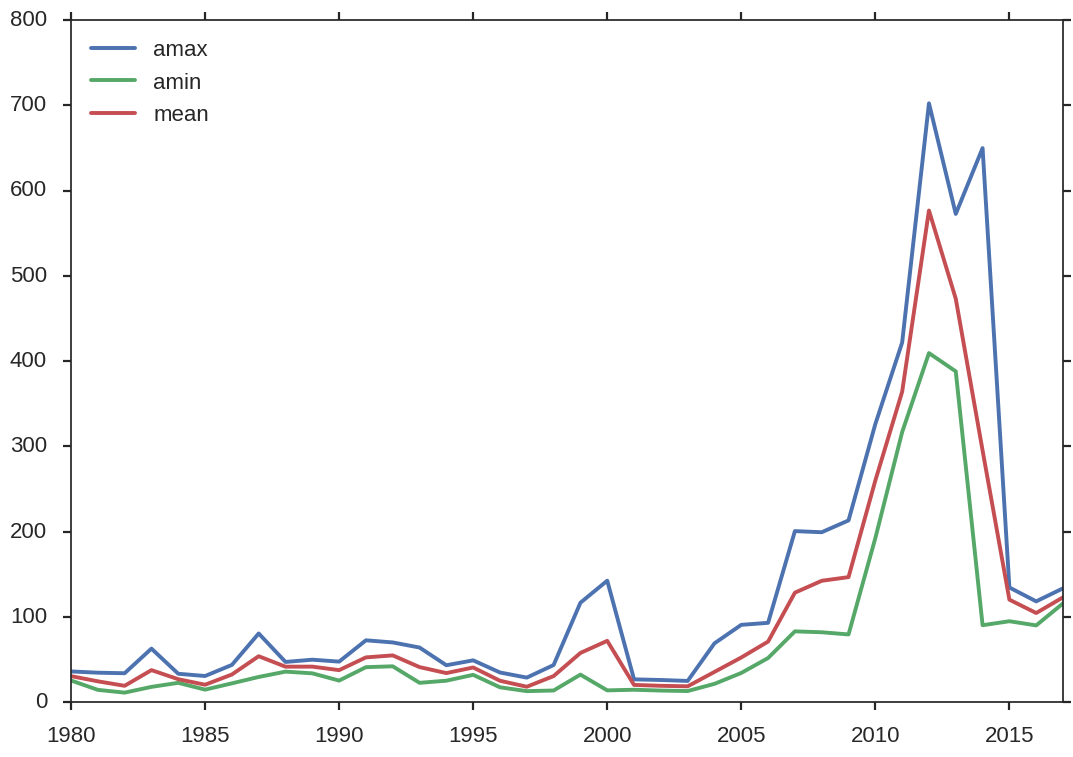

In [51]:
df.groupby(df.index.year)[["Open", "High", "Low", "Close"]].agg([
        np.max, np.min, np.mean,
    ])["Open"].plot()

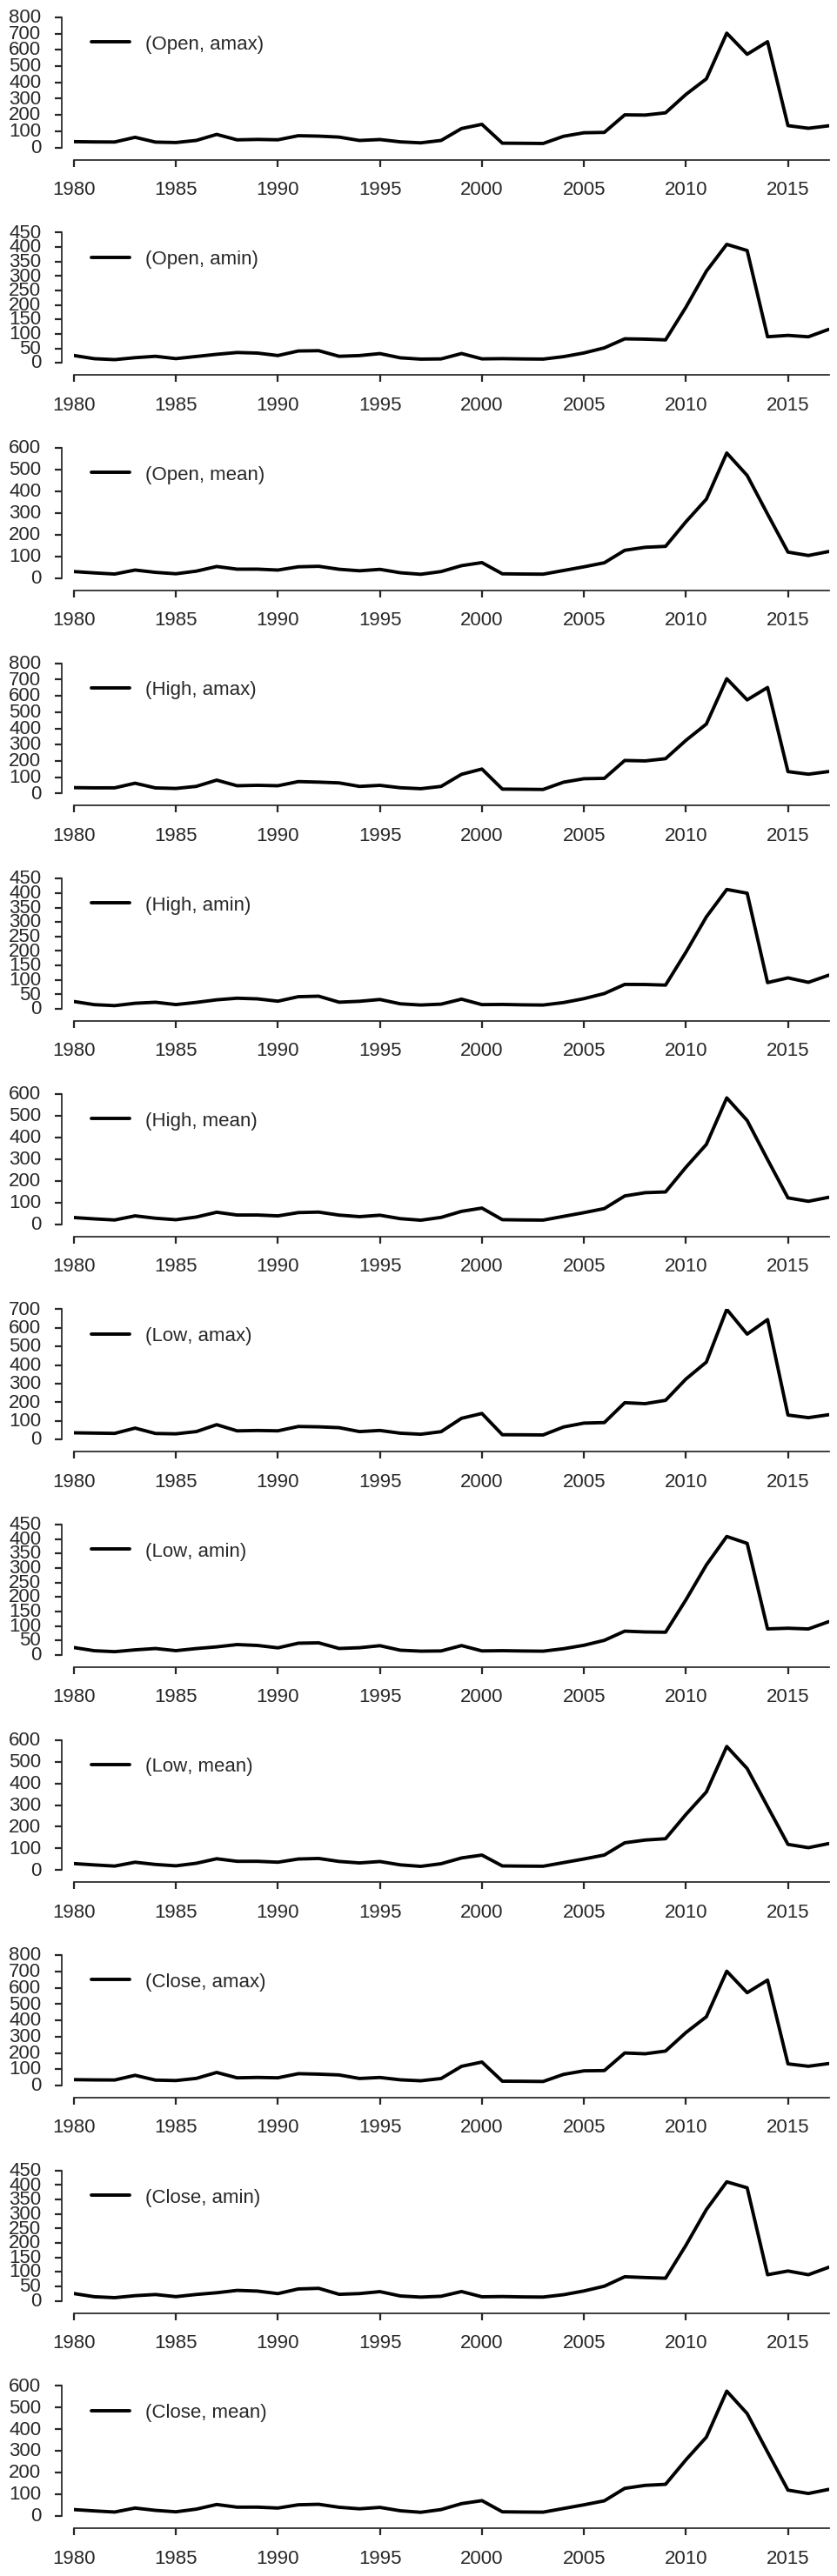

In [39]:
df.groupby(df.index.year)[["Open", "High", "Low", "Close"]].agg([
        np.max, np.min, np.mean,
    ]).plot(subplots=True, figsize=(10, 30), color="k")
sns.despine(offset=10)
plt.gcf().tight_layout()

## Plotting the data

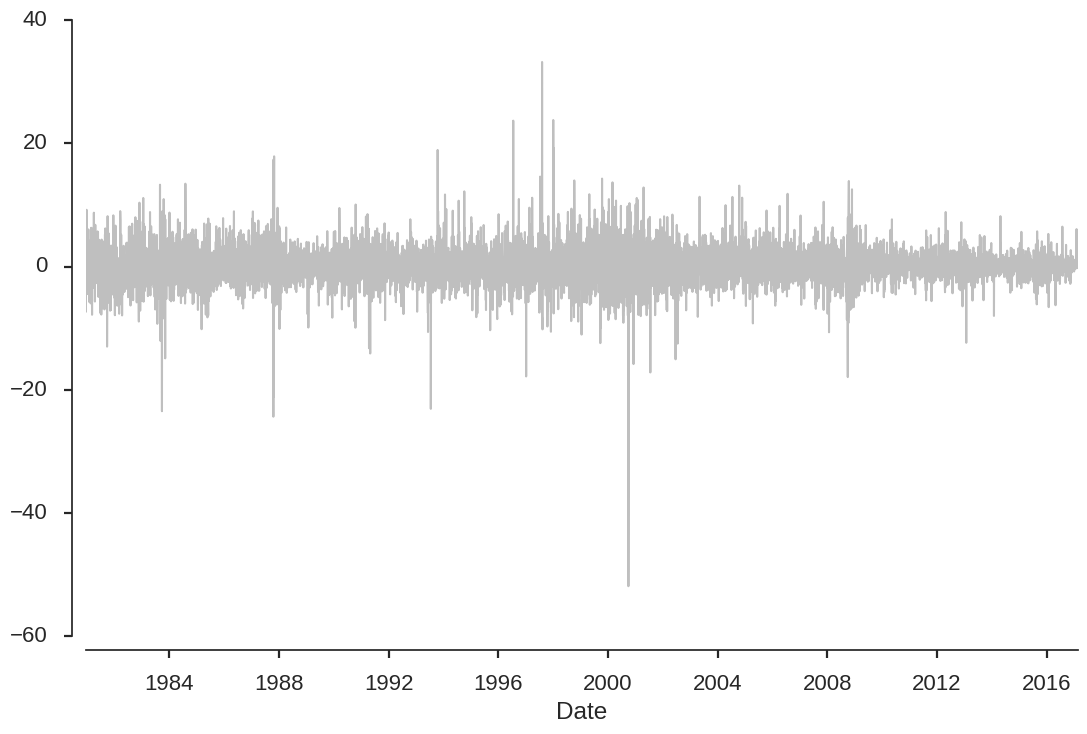

In [40]:
df["% Change"].plot(color="0.5", alpha=0.5, lw=1.5)
sns.despine(offset=10)

Plot only % change between the years 2013 to 2016

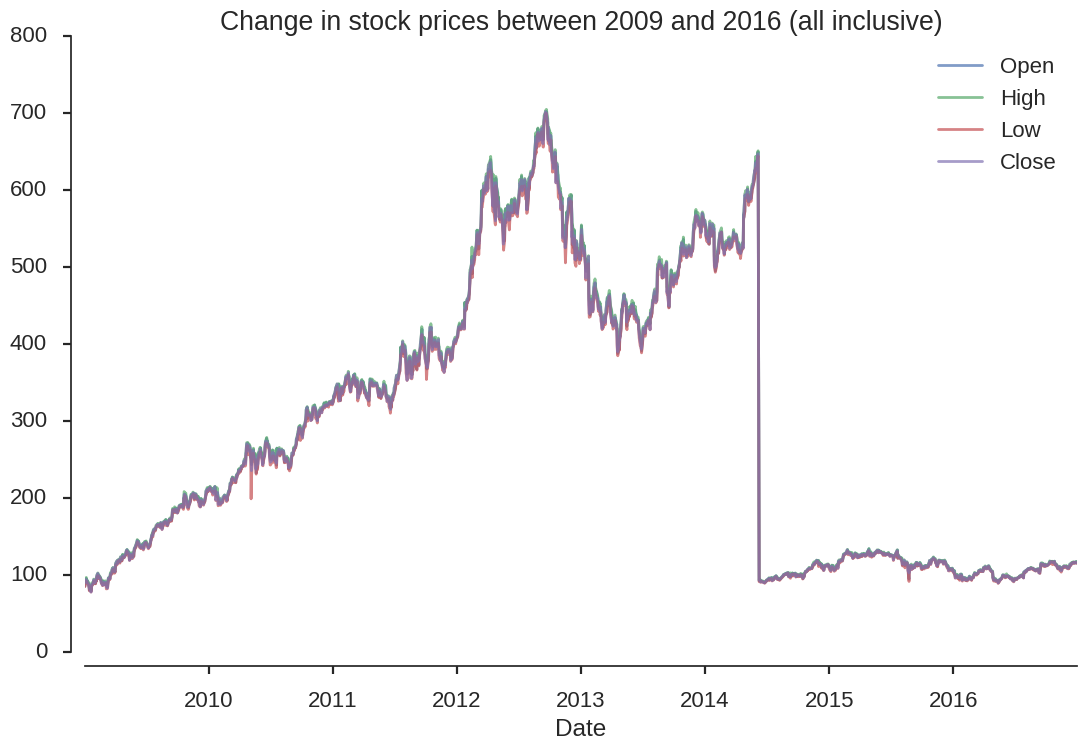

In [52]:
ax = df.ix[(df.index.year <= 2016) 
      & (df.index.year >= 2009), ["Open", "High", "Low", "Close"]].plot(
    alpha=0.7, lw=2,
    title="Change in stock prices between 2009 and 2016 (all inclusive)")
sns.despine(offset=10)

## Creating categories

In [53]:
pd.cut(df.index.month, bins=range(0,13,3))

[(0, 3], (0, 3], (0, 3], (0, 3], (0, 3], ..., (9, 12], (9, 12], (9, 12], (9, 12], (9, 12]]
Length: 9122
Categories (4, object): [(0, 3] < (3, 6] < (6, 9] < (9, 12]]

In [54]:
pd.cut(df.index.month, bins=range(0,13,3)).rename_categories(["Q1", "Q2", "Q3", "Q4"])

[Q1, Q1, Q1, Q1, Q1, ..., Q4, Q4, Q4, Q4, Q4]
Length: 9122
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

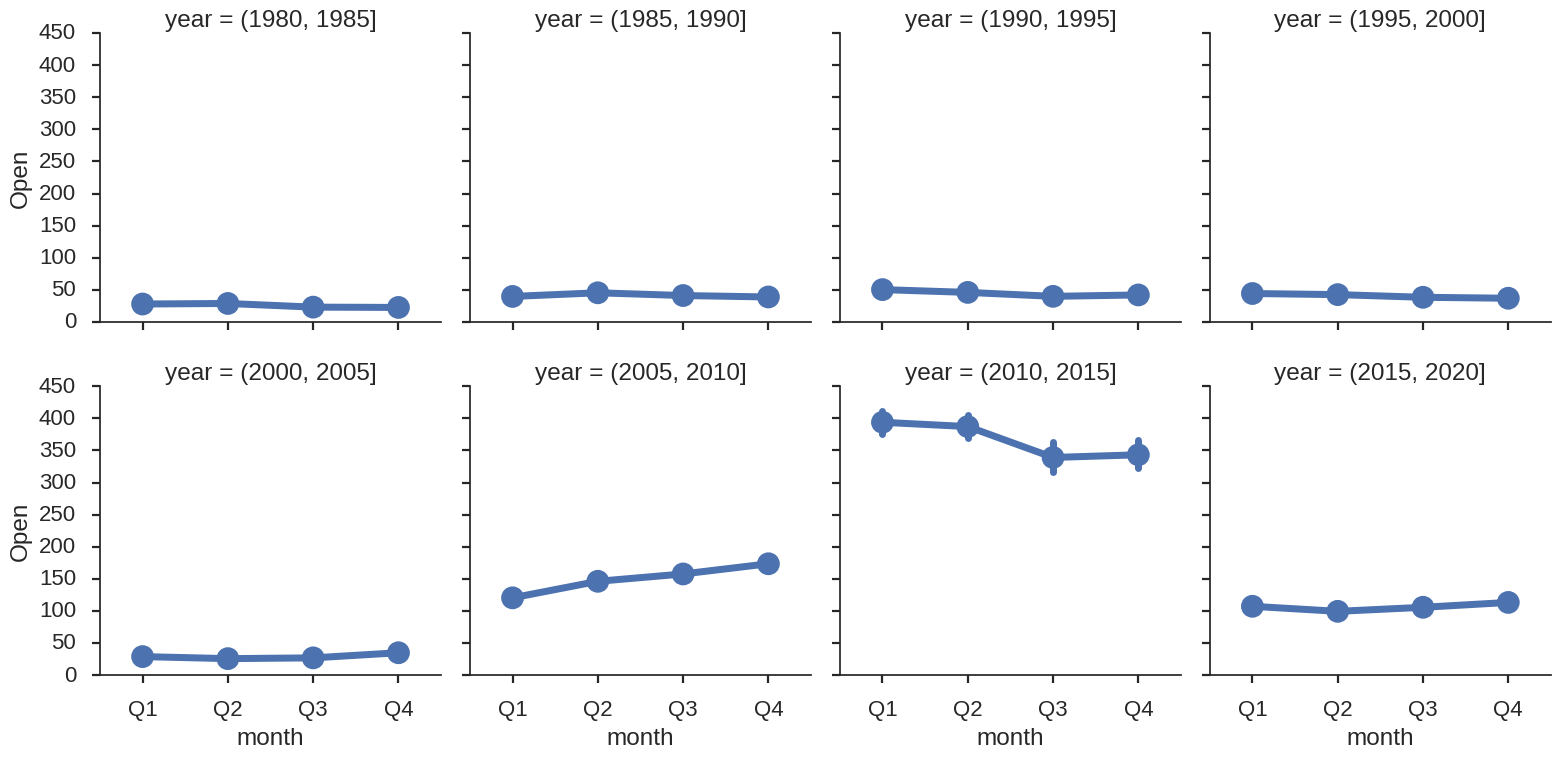

In [55]:
sns.factorplot(x="month", y="Open", col="year", col_wrap=4,
               data=df.assign(
        year=pd.cut(df.index.year, bins=range(1980,2021,5)),
        month=pd.cut(df.index.month, bins=range(0,13,3)
                    ).rename_categories(["Q1", "Q2", "Q3", "Q4"])
    ))